In [1]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [2]:
bessel_function = np.vectorize(lambda x : math.sin(2*math.pi*x)/x)

samples = [20,100,1000,10000]

In [7]:
def train( fonksiyon, N, degree:int, plt_ax=None, train_ratio=0.8):
    if plt_ax == None:
        fig, ax = plt.subplots()
    else:
        ax = plt_ax
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    noise = np.random.normal(0, 0.1, N)  #Gaussian noise 1/10
    noise_transpose = noise.reshape(-1,1)
    
    X = np.random.random(N)
    X_transpose = X.reshape(-1,1)
    Y = fonksiyon(X) + noise             #Bessel + gaussian noise
    
    n_train = int(N * train_ratio)       #verinin %80 i ile tranin edecek
    X_train = X_transpose[:n_train]
    Y_train = Y[:n_train]
    
    X_test = X_transpose[n_train:]
    Y_test = Y[n_train:]
    
    model.fit(X_train,Y_train)
    ax.scatter(X_transpose, Y, label='a')
    
    lspc = np.linspace(0,1,50)
    lspc_transpose = lspc.reshape(-1,1)
    
    ax.plot(lspc_transpose,model.predict(lspc_transpose), label='g', color="red", linewidth=4)
    ax.grid(color="b", linestyle="--")
    ax.set_ylim(-2.5,8)
    ax.set_xlim(-0.1,1.1)
    return mean_squared_error(Y_test, model.predict(X_test))

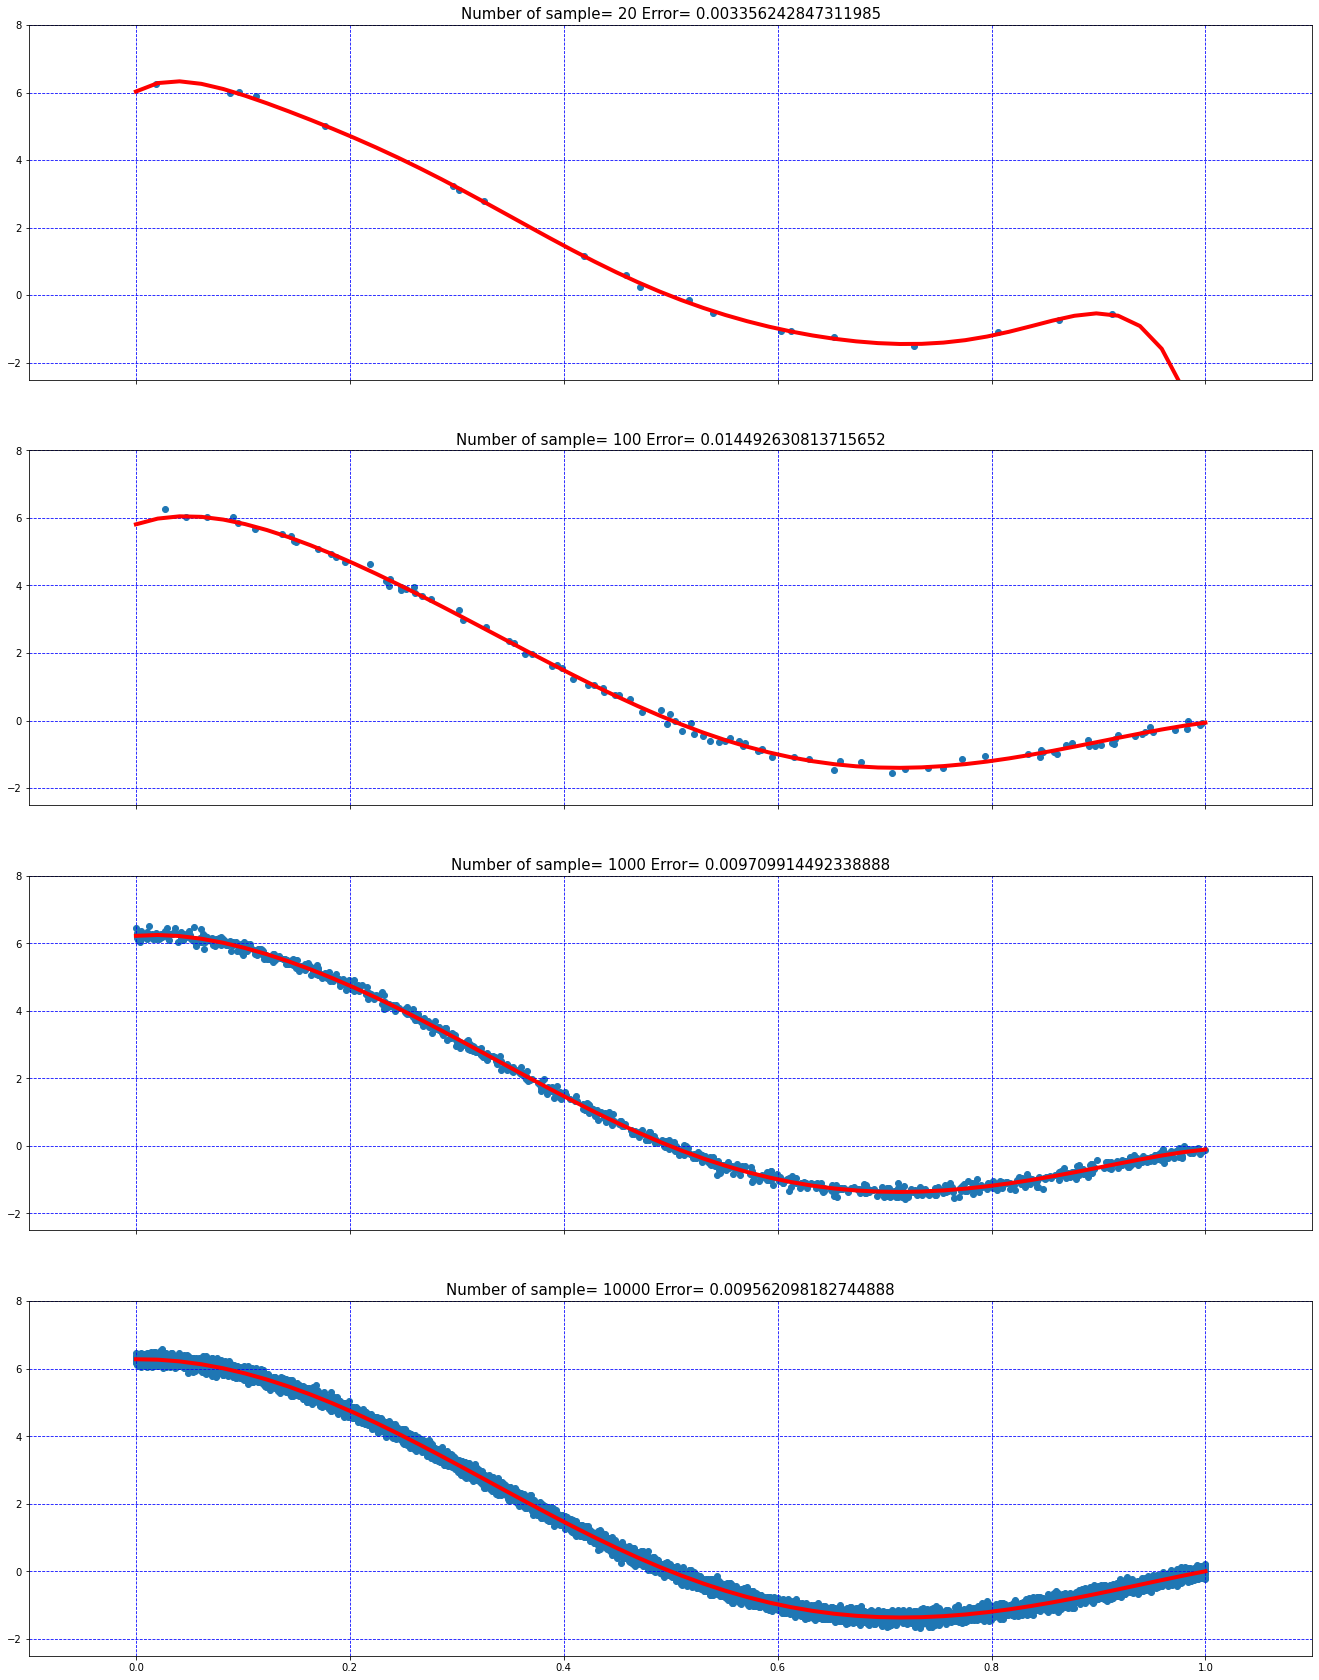

In [8]:
fig = plt.figure(figsize=[23,30])
axes = fig.subplots(len(samples),1, sharex=True)
for i, n in enumerate(samples):
    mean_squarred_err = train(bessel_function, n, 8, plt_ax=axes[i])
    axes[i].set_title("Number of sample= {} Error= {}".format(n,mean_squarred_err), fontsize=15)